In [10]:
import yfinance as yf
import pandas as pd

In [11]:
tsla = yf.Ticker('TSLA')

In [13]:
tsla_data = tsla.history(period="max")

In [14]:
tsla_data.reset_index(inplace=True)

In [15]:
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [16]:
import requests
from bs4 import BeautifulSoup 

In [17]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-12-13 00:00:00-05:00,23.549999,23.700001,20.83,21.000000,6305600,0.0,0.0
1,2022-12-14 00:00:00-05:00,21.190001,22.000000,21.01,21.049999,4604800,0.0,0.0
2,2022-12-15 00:00:00-05:00,20.740000,21.440001,20.24,20.580000,6444500,0.0,0.0
3,2022-12-16 00:00:00-05:00,20.480000,21.120001,20.01,20.799999,9379700,0.0,0.0
4,2022-12-19 00:00:00-05:00,20.549999,20.889999,19.59,19.920000,3700600,0.0,0.0


In [18]:
import matplotlib.pyplot as plt

In [19]:
def make_graph(data):
    data['Close'].plot()
    plt.show()

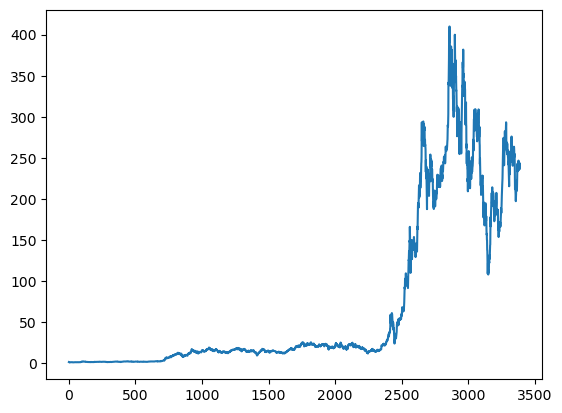

In [20]:
make_graph(tsla_data)

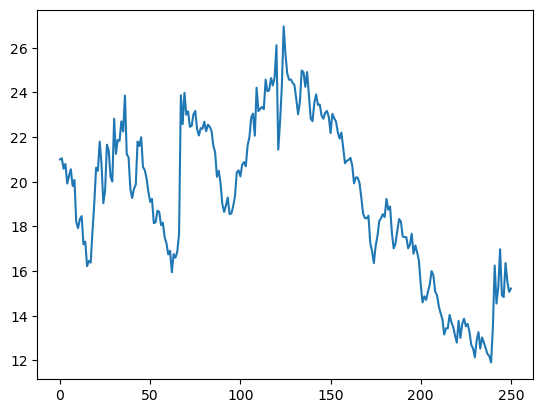

In [21]:
make_graph(gme_data)

In [29]:
url = "https://finance.yahoo.com/quote/TSLA?p=TSLA"

In [30]:
URL = requests.get(url)

In [31]:
URL

<Response [200]>

In [32]:
URL.text

'<!doctype html><html data-color-theme="light" id="atomic" class="NoJs chrome desktop failsafe" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"><title>Tesla, Inc. (TSLA) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta name="keywords" content="TSLA, Tesla, Inc., TSLA stock chart, Tesla, Inc. stock chart, stock chart, stocks, quotes, finance"><meta http-equiv="x-dns-prefetch-control" content="on"><meta property="twitter:dnt" content="on"><meta property="fb:app_id" content="458584288257241"><meta name="theme-color" content="#400090"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="description" lang="en-US" content="Find the latest Tesla, Inc. (TSLA) stock quote, history, news and other vital information to help you with your stock trading and investing."><meta name="oath:guce:consent-host" content="guce.yahoo.c

In [34]:
soup = BeautifulSoup(URL.text,'html.parser')

In [35]:
soup

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Tesla, Inc. (TSLA) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta content="TSLA, Tesla, Inc., TSLA stock chart, Tesla, Inc. stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest Tesla, Inc. (TSLA) stock quote, history, news and other vital information to help you with your stock trading and investing." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:cons

In [38]:
rows = soup.find_all('tr')

In [65]:
rows

[<tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)"><td class="C($primaryColor) W(51%)"><span>Previous Close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-test="PREV_CLOSE-value">235.60</td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)"><td class="C($primaryColor) W(51%)"><span>Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-test="OPEN-value">235.04</td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)"><td class="C($primaryColor) W(51%)"><span>Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-test="BID-value">242.06 x 800</td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)"><td class="C($primaryColor) W(51%)"><span>Ask</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-test="ASK-value">242.11 x 1200</td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)"><td class="C($primaryColor) W(51%)"><span>Day's Range</span></td><td class="Ta(end) Fw(600)

In [63]:
all_rows_data=[]
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    all_rows_data.append(row_data)

In [66]:
cells

[<td class="W(10px) Ta(c) Fw(500) Ta(start) Pend(6px) Bxz(bb)"><span class="Icon-Fp2 undefined"></span></td>,
 <td class="W(70px) Pend(12px) Fw(500) Bxz(bb)"><span class=""><span>Maintains</span></span></td>,
 <td class="C($secondaryColor)">Wedbush<!-- -->: <!-- -->Outperform to Outperform</td>,
 <td class="Ta(end) C($tertiaryColor) Fz(xs)"><span>10/19/2023</span></td>]

In [67]:
row_data

['', 'Maintains', 'Wedbush: Outperform to Outperform', '10/19/2023']

In [64]:
all_rows_data

[['Previous Close', '235.60'],
 ['Open', '235.04'],
 ['Bid', '242.06 x 800'],
 ['Ask', '242.11 x 1200'],
 ["Day's Range", '233.34 - 243.62'],
 ['52 Week Range', '101.81 - 299.29'],
 ['Volume', '46,611,055'],
 ['Avg. Volume', '121,212,673'],
 ['Market Cap', '764.594B'],
 ['Beta (5Y Monthly)', '2.28'],
 ['PE Ratio (TTM)', '77.34'],
 ['EPS (TTM)', '3.11'],
 ['Earnings Date', 'Jan 23, 2024 - Jan 29, 2024'],
 ['Forward Dividend & Yield', 'N/A (N/A)'],
 ['Ex-Dividend Date', 'N/A'],
 ['1y Target Est', '224.90'],
 [],
 ['AMZNAmazon.com, Inc.', '141.98', '-4.15', '-2.84%'],
 ['AAPLApple Inc.', '190.32', '-1.12', '-0.59%'],
 ['METAMeta Platforms, Inc.', '336.46', '-3.51', '-1.03%'],
 ['NFLXNetflix, Inc.', '474.29', '-0.18', '-0.04%'],
 ['GOOGAlphabet Inc.', '138.44', '+0.52', '+0.38%'],
 [],
 ['NIONIO Inc.', '7.46', '-0.34', '-4.39%'],
 ['RIVNRivian Automotive, Inc.', '16.00', '-0.93', '-5.50%'],
 ['LCIDLucid Group, Inc.', '4.1750', '-0.1650', '-3.80%'],
 ['FFord Motor Company', '10.16', '-0.18'

In [50]:
all_rows_data[15]

['1y Target Est', '224.90']

In [53]:
re_all_rows_data = all_rows_data[0:16]

In [54]:
re_all_rows_data

[['Previous Close', '235.60'],
 ['Open', '235.04'],
 ['Bid', '242.06 x 800'],
 ['Ask', '242.11 x 1200'],
 ["Day's Range", '233.34 - 243.62'],
 ['52 Week Range', '101.81 - 299.29'],
 ['Volume', '46,611,055'],
 ['Avg. Volume', '121,212,673'],
 ['Market Cap', '764.594B'],
 ['Beta (5Y Monthly)', '2.28'],
 ['PE Ratio (TTM)', '77.34'],
 ['EPS (TTM)', '3.11'],
 ['Earnings Date', 'Jan 23, 2024 - Jan 29, 2024'],
 ['Forward Dividend & Yield', 'N/A (N/A)'],
 ['Ex-Dividend Date', 'N/A'],
 ['1y Target Est', '224.90']]

In [55]:
df = pd.DataFrame(re_all_rows_data)

In [56]:
df

,0,1
0,Previous Close,235.60
1,Open,235.04
2,Bid,242.06 x 800
3,Ask,242.11 x 1200
4,Day's Range,233.34 - 243.62
5,52 Week Range,101.81 - 299.29
6,Volume,"46,611,055"
7,Avg. Volume,"121,212,673"
8,Market Cap,764.594B
9,Beta (5Y Monthly),2.28


In [57]:
df.columns = ['Item','Value']

In [58]:
df

,Item,Value
0,Previous Close,235.60
1,Open,235.04
2,Bid,242.06 x 800
3,Ask,242.11 x 1200
4,Day's Range,233.34 - 243.62
5,52 Week Range,101.81 - 299.29
6,Volume,"46,611,055"
7,Avg. Volume,"121,212,673"
8,Market Cap,764.594B
9,Beta (5Y Monthly),2.28


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt